# (EDA for the Ford Bike share data- February 2019 in San Francisco)
## by (Jawwad Hussain)

## Investigation Overview

> Review 2019 bike share data provided by the course and create Univariate, Bivariate and Multivariate meaningful visuals to understand the relationships.
> Also, use the visuals found through Exploratory analysis and present it to the audience in a simpler way for their Explanatory analysis.

## Dataset Overview

> The dataset used contains 180k roughly rows and 16 columns containing the bike rent duration, rider's membership status, start and end station ids and names, genders etc. 
> Some columns in the dataset have been engineered and transformed to find the age of biker's from their birth year, also calculated the hours of ride duration for a simpler view etc.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike= pd.read_csv('C:/Users/hussaja/Documents/Udacity_DataAnalytics_NanoDegree/Course5- Data Visualization/Project/201902-fordgobike-tripdata.csv')
bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)- Univariate Type

> The following visualization plot shows the histogram distribution of the trip duration(sec). It shows that from 500 to 1000 secs ( 0.14-0.3 hours) the trip counts take a peak from 10k to to 12.5k roughly. It is a unimodal distribution and slides downwards from the peak onwards.
> The x-axis had to be converted to log scale since for better visuals and longer tail of the non-logarithmic chart.

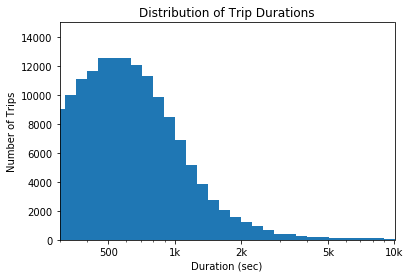

In [4]:
bins= 10**np.arange(0, 5+1,0.05)
plt.hist(data=bike,x='duration_sec',bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.xlim(300,10000);
plt.show()

## (Visualization 2)- Univariate and Bivariate types

> The following visuals show the distribution of start and end station distribution.
> It shows that the station distribution is the same almost in both the cases.
> Also some conversion was done to convert `duration_sec` to `duration_hr` for the ease of visuals. Violin plot for the Gender type vs the duration of hour shows that the median of Females's bike hour duration is around 0.16 hours. Other two genders are also very close to this number.
> The count of gender type based on their subscription type shows that 'Subscribers' have higher counts vs 'Customers' and Male seem to dominate it.
> The boxplot for bivariate relationship shows that on average Females in the dataset are 1 year younger than Men and 2 year younger than Other Genders. Looking at the outliers, Female population have more outliers than the other two as well.

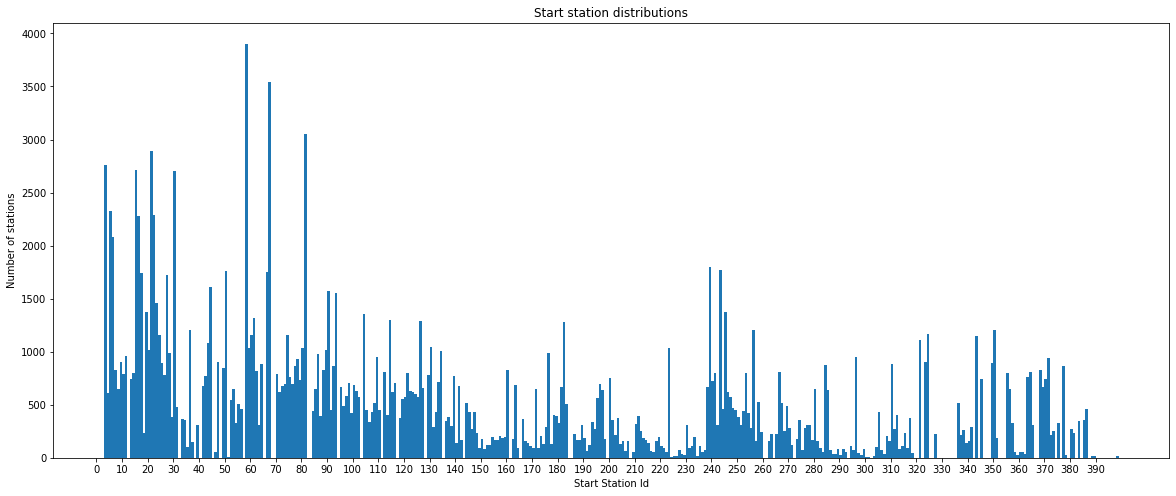

In [5]:
# Univariate plot for start station ids.
plt.figure(figsize=[20,8])
bin_start_station= np.arange(3,398+2,1)
plt.hist(data=bike,x='start_station_id',bins=bin_start_station);
plt.xticks(range(0, 400, 10));
plt.title('Start station distributions');
plt.xlabel('Start Station Id');
plt.ylabel('Number of stations');

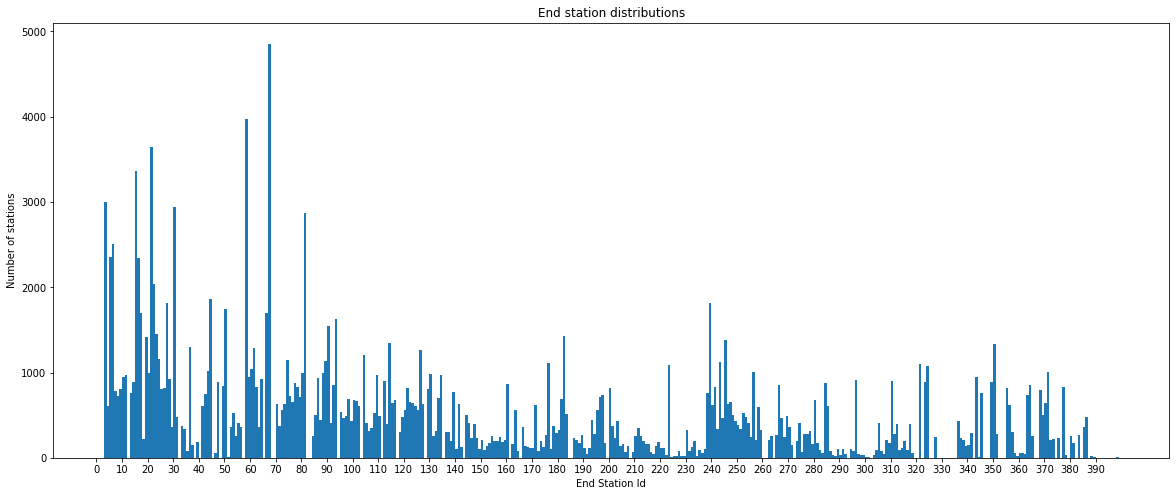

In [6]:
# Univariate plot for end station ids.
plt.figure(figsize=[20,8])
bin_end_station= np.arange(3,398+2,1)
plt.hist(data=bike,x='end_station_id',bins=bin_end_station);
plt.xticks(range(0, 400, 10));
plt.title('End station distributions');
plt.xlabel('End Station Id');
plt.ylabel('Number of stations');

In [10]:
bike['duration_min']= bike['duration_sec']/60
bike.head()
bike['duration_hr']= bike['duration_min']/60

No handles with labels found to put in legend.


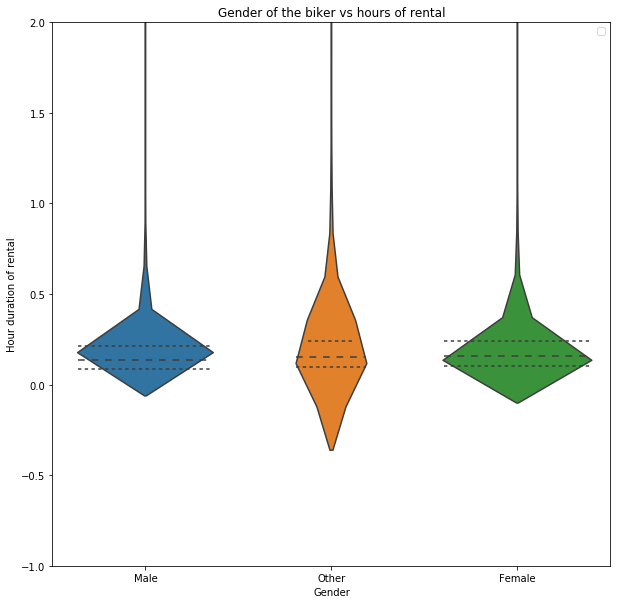

In [11]:
# Calculating which gender rents the for longer hours.
bike.head()
plt.figure(figsize=[10,10])
sb.violinplot(data=bike,x='member_gender',y='duration_hr',inner='quartile');
plt.ylim(-1,2);
plt.xlabel('Gender');
plt.ylabel('Hour duration of rental');
plt.title('Gender of the biker vs hours of rental');
plt.legend();

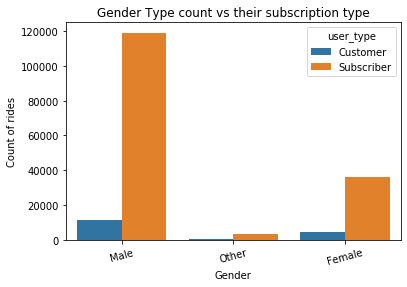

In [14]:
# Finding which subscriber rides more bikes vs genders.
sb.countplot(data= bike, x='member_gender',hue='user_type');
plt.xticks(rotation=15);
plt.xlabel('Gender');
plt.ylabel('Count of rides');
plt.title('Gender Type count vs their subscription type');

No handles with labels found to put in legend.


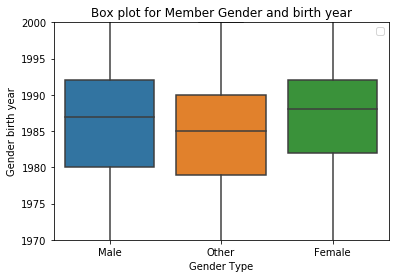

In [26]:
# Finding the relationship between the gender and their year of birth.
sb.boxplot(data=bike,x='member_gender',y='member_birth_year');
plt.ylim(1970,2000);
plt.xlabel('Gender Type');
plt.ylabel('Gender birth year');
plt.title('Box plot for Member Gender and birth year');

## (Visualization 3)- Multivariate type.
> There is a jump in the duration(sec) for 'Other' gender specially above 50 years of age.
> In this case both Customer and Subscriber are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

In [22]:
# Adding age column in the dataset to compute the member's age. Dataset belongs to 2019 so computing it with that year.
bike['age']= 2019 - bike['member_birth_year']

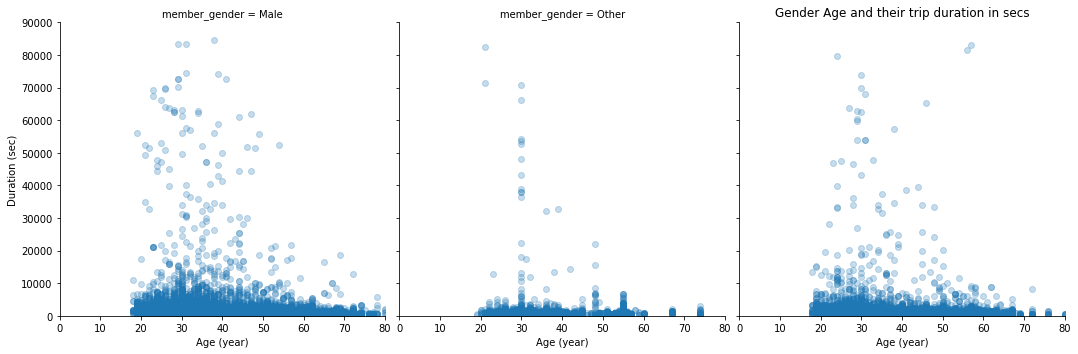

In [24]:
# Plotting multivariate plot for gender vs duration(sec) with respect to their age.
g= sb.FacetGrid(data= bike,col='member_gender',col_wrap=3,size=5);
g=g.map(plt.scatter,'age','duration_sec',alpha=0.25);
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')
plt.title('Gender Age and their trip duration in secs');
plt.xlim(0,80);
plt.ylim(0,90000)
plt.show();

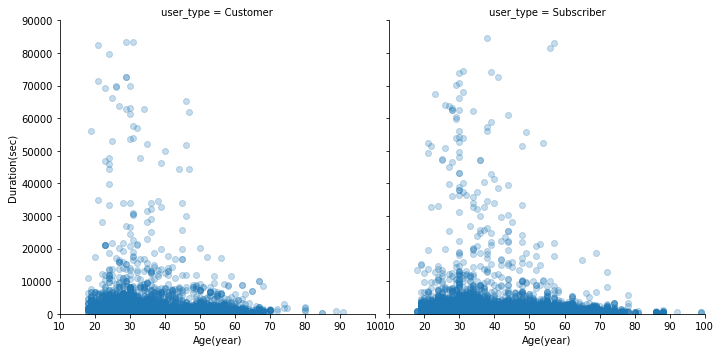

In [25]:
# Multivariate plot for age of the users vs their subscription time and trip duration.
g= sb.FacetGrid(data=bike,col='user_type',col_wrap=2,size=5);
g=g.map(plt.scatter,'age','duration_sec',alpha=0.25);
g.set_xlabels('Age(year)');
g.set_ylabels('Duration(sec)')
plt.xlim(10,100);
plt.ylim(0,90000);
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [4]:
!jupyter nbconvert Slidedeck_Explanatory_DataAnalysis.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] Converting notebook Slidedeck_Explanatory_DataAnalysis.ipynb to slides
[NbConvertApp] Writing 535650 bytes to Slidedeck_Explanatory_DataAnalysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\hussaja\AppData\Local\Continuum\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\hussaja\AppData\Local\Continuum\anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\hussaja\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\hussaja\AppData\Local\Continuum\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\hussaja\AppData\L